## MaxCut

In [1]:
from QHyper.problems.maxcut import MaxCutProblem


sample_graph_edges = [(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

maxcut_problem = MaxCutProblem(edges=sample_graph_edges)
print(f"variables: {maxcut_problem.variables}")
print(
    f"objective function: {maxcut_problem.objective_function.as_polynomial()}"
)

variables: (x0, x1, x2, x3, x4)
objective function: -x0*(1 - x1) - x0*(1 - x2) - x1*(1 - x0) - x1*(1 - x3) - x2*(1 - x0) - x2*(1 - x3) - x2*(1 - x4) - x3*(1 - x1) - x3*(1 - x2) - x3*(1 - x4) - x4*(1 - x2) - x4*(1 - x3)


In [2]:
import networkx as nx
from matplotlib import pyplot as plt


def plot_save_results(
    sampleset_results: dict, maxcut_problem: MaxCutProblem, **kwargs
) -> None:
    plt.cla()

    G = nx.Graph()
    G.add_edges_from(maxcut_problem.edges)
    S0 = [
        i + 1 for i, val in enumerate(sampleset_results.values()) if val == 0
    ]
    S1 = [
        i + 1 for i, val in enumerate(sampleset_results.values()) if val == 1
    ]

    lut = {i + 1: val for i, val in enumerate(sampleset_results.values())}
    cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color="r")
    nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color="c")
    nx.draw_networkx_edges(
        G, pos, edgelist=cut_edges, style="dashdot", alpha=0.5, width=3
    )
    nx.draw_networkx_edges(
        G, pos, edgelist=uncut_edges, style="solid", width=3
    )
    nx.draw_networkx_labels(G, pos)

    if "path" in kwargs:
        path = kwargs.get("path")
        plt.savefig(path, bbox_inches="tight")
        print("\nYour plot is saved to {}".format(path))
    plt.show()

### DQM

{'x0': 0, 'x1': 1, 'x2': 1, 'x3': 0, 'x4': 1}


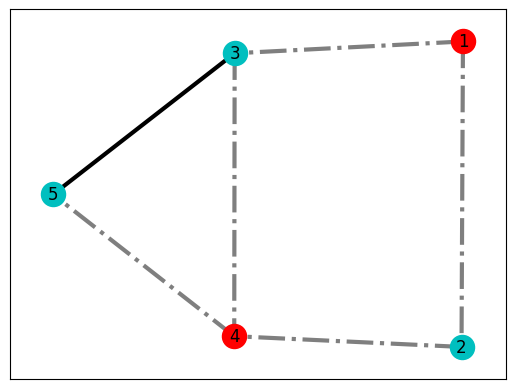

In [3]:
from QHyper.solvers.dqm import DQM


maxcut_dqm = DQM(maxcut_problem, time=5)
maxcut_sampleset = maxcut_dqm.solve()

sample_dqm = maxcut_sampleset.first.sample
print(sample_dqm)

filename = "./demo_output/maxcut_dqm.png"
plot_save_results(sample_dqm, maxcut_problem)

### CQM

{'x0': 1.0, 'x1': 0.0, 'x2': 0.0, 'x3': 1.0, 'x4': 0.0}


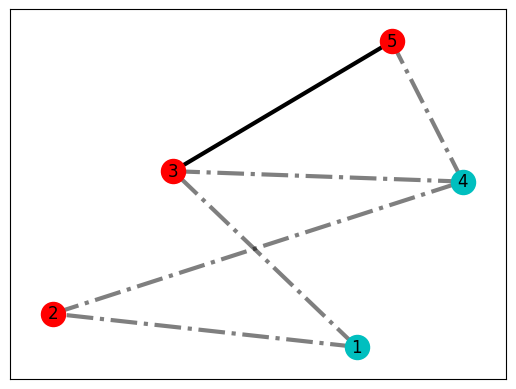

In [7]:
from QHyper.solvers.cqm import CQM


maxcut_cqm = CQM(maxcut_problem, time=5)
solution = maxcut_cqm.solve()

print(solution)
filename = "./demo_output/maxcut_cqm.png"
plot_save_results(solution, maxcut_problem)

DQM result score

In [6]:
maxcut_problem.get_score(result="".join([str(int(v)) for v in sample_dqm.values()]))

5

CQM result score

In [8]:
maxcut_problem.get_score(result="".join([str(int(v)) for v in solution.values()]))

5

As can be seen, there are several optimal solutions to the problem.